# Tutorial: Red Neuronal Convolucional para Reconocimiento de Imágenes

Este tutorial proporciona una guía completa sobre cómo implementar una Red Neuronal Convolucional (CNN) utilizando Keras para el reconocimiento de imágenes.

## Referencias
- [DataCamp: Introduction to Convolutional Neural Networks](https://www.datacamp.com/tutorial/introduction-to-convolutional-neural-networks-cnns)
- [Medium: Convolutional Neural Network CNN](https://medium.com/@RobuRishabh/convolutional-neural-network-cnn-part-1-d1c027913b2b)


---

# 1. Descripción de las Características/Niveles/Síntomas Empleados en el Dataset

Para este tutorial utilizaremos el conjunto de datos **CIFAR-10**, que es ampliamente utilizado para la clasificación de imágenes. A continuación se describen las características del dataset:


## 1.1 Características del Dataset CIFAR-10

**CIFAR-10** (Canadian Institute For Advanced Research) es un conjunto de datos de reconocimiento de objetos que contiene:

- **Total de imágenes**: 60,000 imágenes a color
- **División**:
  - 50,000 imágenes para entrenamiento
  - 10,000 imágenes para prueba
- **Resolución**: 32x32 píxeles
- **Canales de color**: 3 canales RGB (Red, Green, Blue)
- **Forma de los datos**: (ancho, alto, canales) = (32, 32, 3)

## 1.2 Clases del Dataset

El dataset contiene **10 clases** diferentes de objetos:

| Etiqueta | Clase | Descripción |
|----------|-------|-------------|
| 0 | avión | Aeronaves de diferentes tipos |
| 1 | automóvil | Vehículos terrestres motorizados |
| 2 | pájaro | Aves de diversas especies |
| 3 | gato | Felinos domésticos |
| 4 | ciervo | Animales de la familia Cervidae |
| 5 | perro | Caninos domésticos |
| 6 | rana | Anfibios de la orden Anura |
| 7 | caballo | Equinos de diferentes razas |
| 8 | barco | Embarcaciones acuáticas |
| 9 | camión | Vehículos de carga pesada |

## 1.3 Características de las Imágenes

- **Valores de píxeles**: Enteros en el rango [0, 255]
- **Normalización requerida**: Los valores deben normalizarse al rango [0, 1] dividiendo por 255.0
- **Complejidad**: Las imágenes son de baja resolución pero contienen objetos completos con contexto
- **Variabilidad**: Cada clase presenta alta variabilidad en poses, fondos, iluminación y perspectivas


In [58]:
# Configurar SSL ANTES de importar TensorFlow/Keras
# Esto es necesario en algunos sistemas macOS para evitar errores de certificado
import ssl
import os
import urllib.request

# Deshabilitar verificación SSL para descargas (solo para desarrollo/educación)
# NOTA: En producción, es mejor instalar certificados SSL correctamente
ssl._create_default_https_context = ssl._create_unverified_context

# Configurar urllib para usar contexto SSL sin verificación
original_urlopen = urllib.request.urlopen
def urlopen_patch(*args, **kwargs):
    if 'context' not in kwargs:
        kwargs['context'] = ssl._create_unverified_context()
    return original_urlopen(*args, **kwargs)
urllib.request.urlopen = urlopen_patch

# Importar las librerías necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print(f"Version de TensorFlow: {tf.__version__}")
print(f"Version de Keras: {tf.keras.__version__}")
print("Configuracion SSL aplicada para descarga de datasets")


Version de TensorFlow: 2.20.0
Version de Keras: 3.12.0
Configuracion SSL aplicada para descarga de datasets


In [59]:
# Cargar el dataset CIFAR-10
print("Descargando dataset CIFAR-10...")

try:
    (train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
    print("Dataset CIFAR-10 cargado exitosamente")
except Exception as e:
    print(f"Error al cargar el dataset: {e}")
    print("\nSi el error persiste, intenta:")
    print("1. Verificar tu conexion a internet")
    print("2. Ejecutar en terminal: /Applications/Python\\ 3.12/Install\\ Certificates.command")
    print("3. O descargar manualmente desde: https://www.cs.toronto.edu/~kriz/cifar.html")
    raise

# Nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Explorar el dataset
print("\n=== Información del Dataset ===")
print(f"Forma de las imágenes de entrenamiento: {train_images.shape}")
print(f"Forma de las etiquetas de entrenamiento: {train_labels.shape}")
print(f"Forma de las imágenes de prueba: {test_images.shape}")
print(f"Forma de las etiquetas de prueba: {test_labels.shape}")
print(f"\nTipo de dato de las imágenes: {train_images.dtype}")
print(f"Rango de valores de píxeles: [{train_images.min()}, {train_images.max()}]")
print(f"\nNúmero de clases: {len(class_names)}")
print(f"Clases: {class_names}")


Descargando dataset CIFAR-10...
Dataset CIFAR-10 cargado exitosamente

=== Información del Dataset ===
Forma de las imágenes de entrenamiento: (50000, 32, 32, 3)
Forma de las etiquetas de entrenamiento: (50000, 1)
Forma de las imágenes de prueba: (10000, 32, 32, 3)
Forma de las etiquetas de prueba: (10000, 1)

Tipo de dato de las imágenes: uint8
Rango de valores de píxeles: [0, 255]

Número de clases: 10
Clases: ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']


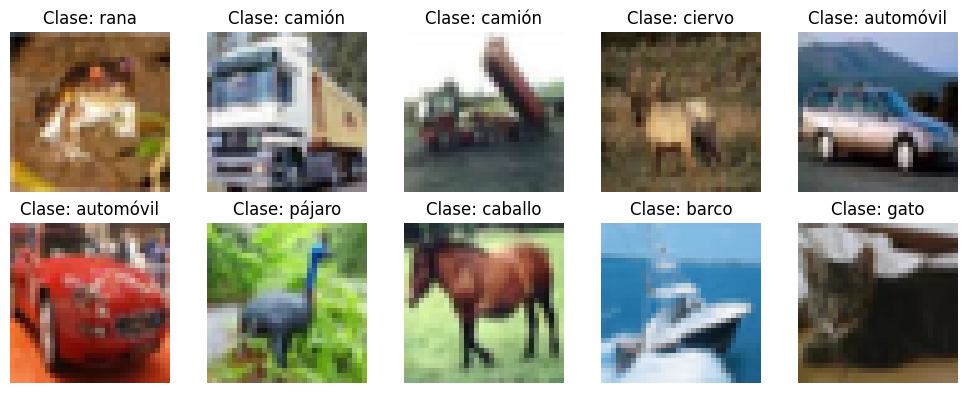

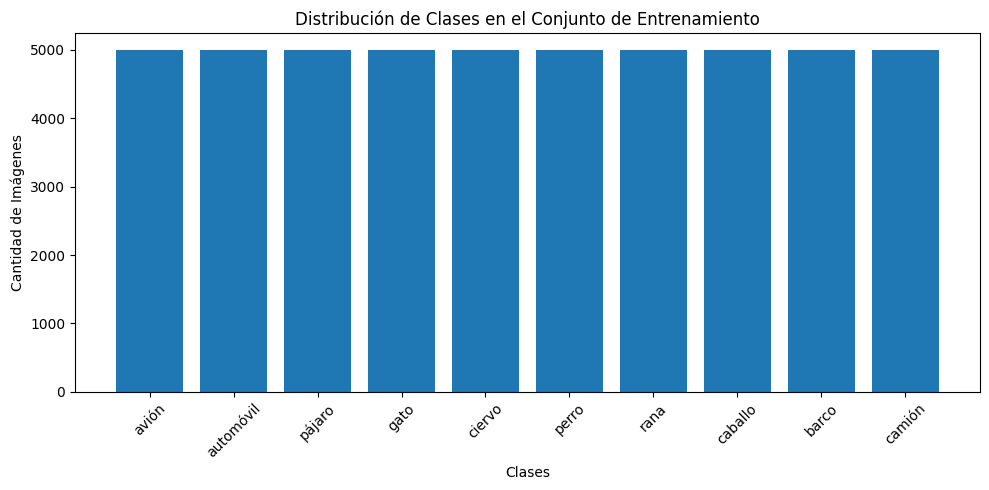

In [60]:
# Visualizar algunas imágenes del dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(f"Clase: {class_names[train_labels[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Mostrar distribución de clases
unique, counts = np.unique(train_labels, return_counts=True)
plt.figure(figsize=(10, 5))
plt.bar([class_names[i] for i in unique], counts)
plt.title('Distribución de Clases en el Conjunto de Entrenamiento')
plt.xlabel('Clases')
plt.ylabel('Cantidad de Imágenes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---

# 2. Descripción de la Librería, Clases, Funciones y Parámetros

A continuación se presenta un resumen breve de las principales librerías, clases, funciones y parámetros empleados en este tutorial:


## 2.1 TensorFlow y Keras

**TensorFlow**: Librería de código abierto desarrollada por Google para aprendizaje automático y aprendizaje profundo. Proporciona una plataforma completa para construir y entrenar modelos de redes neuronales.

**Keras**: API de alto nivel que corre sobre TensorFlow (y otros backends). Facilita la construcción de modelos de deep learning con una sintaxis intuitiva y modular.

## 2.2 Clases y Funciones Principales

### `datasets.cifar10.load_data()`
- **Propósito**: Carga el dataset CIFAR-10 desde los servidores de Keras
- **Retorna**: Tupla con datos de entrenamiento y prueba
- **Parámetros**: No requiere parámetros

### `models.Sequential()`
- **Propósito**: Crea un modelo secuencial donde las capas se apilan una tras otra
- **Uso**: Permite construir modelos lineales paso a paso
- **Parámetros**: Lista opcional de capas para inicializar el modelo

### `layers.Conv2D()` - Capa Convolucional 2D
- **Propósito**: Aplica filtros convolucionales bidimensionales para detectar características espaciales
- **Parámetros principales**:
  - `filters` (int): Número de filtros (kernels) a aplicar. Más filtros = más características detectadas
  - `kernel_size` (int o tupla): Tamaño del filtro convolucional (e.g., 3x3, 5x5)
  - `activation` (str): Función de activación ('relu', 'sigmoid', 'tanh', etc.)
  - `input_shape` (tupla): Forma de la entrada para la primera capa (alto, ancho, canales)
  - `padding` (str): 'valid' (sin padding) o 'same' (con padding para mantener dimensiones)
  - `strides` (int o tupla): Paso del filtro (default: 1)

### `layers.MaxPooling2D()` - Capa de Agrupamiento Máximo
- **Propósito**: Reduce las dimensiones espaciales aplicando operación de máximo sobre ventanas
- **Beneficios**: Reduce parámetros, previene sobreajuste, hace el modelo más robusto a traslaciones
- **Parámetros principales**:
  - `pool_size` (int o tupla): Tamaño de la ventana de pooling (e.g., 2x2)
  - `strides` (int o tupla): Paso del pooling (default: igual a pool_size)
  - `padding` (str): 'valid' o 'same'

### `layers.Flatten()`
- **Propósito**: Convierte la salida multidimensional de las capas convolucionales en un vector unidimensional
- **Uso**: Necesario antes de conectar a capas densas
- **Parámetros**: No requiere parámetros

### `layers.Dense()` - Capa Totalmente Conectada
- **Propósito**: Capa donde cada neurona está conectada a todas las neuronas de la capa anterior
- **Parámetros principales**:
  - `units` (int): Número de neuronas en la capa
  - `activation` (str): Función de activación ('relu', 'softmax', 'linear', etc.)

### `layers.Dropout()` - Regularización
- **Propósito**: Desactiva aleatoriamente un porcentaje de neuronas durante el entrenamiento para prevenir sobreajuste
- **Parámetros**:
  - `rate` (float): Fracción de neuronas a desactivar (0.0 a 1.0)

### `model.compile()` - Configuración del Modelo
- **Propósito**: Configura el modelo para el entrenamiento especificando optimizador, función de pérdida y métricas
- **Parámetros principales**:
  - `optimizer` (str o objeto): Algoritmo de optimización ('adam', 'sgd', 'rmsprop', etc.)
    - **Adam**: Combina ventajas de AdaGrad y RMSProp, adapta la tasa de aprendizaje
  - `loss` (str o función): Función de pérdida a minimizar
    - **SparseCategoricalCrossentropy**: Para clasificación multi-clase con etiquetas enteras
  - `metrics` (lista): Métricas a monitorear durante entrenamiento y evaluación (['accuracy'])

### `model.fit()` - Entrenamiento del Modelo
- **Propósito**: Entrena el modelo con los datos proporcionados
- **Parámetros principales**:
  - `x` (array): Datos de entrada (imágenes)
  - `y` (array): Etiquetas objetivo
  - `epochs` (int): Número de épocas (pasadas completas sobre el dataset)
  - `batch_size` (int): Número de muestras por actualización de gradiente (default: 32)
  - `validation_data` (tupla): Datos para validación durante entrenamiento
  - `verbose` (int): Nivel de detalle (0=silencioso, 1=barra de progreso, 2=una línea por época)

### `model.predict()` - Predicción
- **Propósito**: Genera predicciones para nuevas muestras
- **Parámetros**:
  - `x` (array): Datos de entrada para predecir
- **Retorna**: Array con probabilidades o logits para cada clase

### `model.evaluate()` - Evaluación
- **Propósito**: Evalúa el modelo con datos de prueba
- **Parámetros**:
  - `x` (array): Datos de entrada
  - `y` (array): Etiquetas verdaderas
  - `verbose` (int): Nivel de detalle
- **Retorna**: Tupla con pérdida y métricas especificadas

## 2.3 Funciones de Activación

- **ReLU (Rectified Linear Unit)**: `f(x) = max(0, x)`
  - Ventaja: Soluciona el problema de desvanecimiento del gradiente
  - Uso: Capas intermedias (conv, dense)

- **Softmax**: Convierte logits en probabilidades que suman 1
  - Uso: Última capa en clasificación multi-clase

## 2.4 Optimizadores

- **Adam (Adaptive Moment Estimation)**: Optimizador adaptativo que combina momentum y adaptación de tasa de aprendizaje
  - Ventajas: Convergencia rápida, poco ajuste de hiperparámetros
  - Parámetros típicos: learning_rate=0.001 (default)


In [61]:
# Preprocesamiento de los datos
# Normalizar los valores de píxeles al rango [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Verificar la normalización
print(f"Rango de valores después de normalización: [{train_images.min():.2f}, {train_images.max():.2f}]")
print(f"Forma de las imágenes normalizadas: {train_images.shape}")


Rango de valores después de normalización: [0.00, 1.00]
Forma de las imágenes normalizadas: (50000, 32, 32, 3)


---

# 3. Pipeline

## 3.1 Model Selection - Selección del Modelo

### Razones Formales para Emplear la API de Keras:

1. **Simplicidad y Abstracción de Alto Nivel**:
   - Keras proporciona una API intuitiva y fácil de usar que simplifica la construcción de modelos complejos
   - Reduce la cantidad de código necesario comparado con TensorFlow puro
   - Facilita la prototipación rápida y la experimentación

2. **Modularidad**:
   - Permite construir modelos mediante la composición de capas pre-construidas
   - Facilita la reutilización de componentes
   - Asegura consistencia en la implementación

3. **Optimizaciones Integradas**:
   - Implementa automáticamente optimizaciones de rendimiento
   - Soporte para aceleración por GPU/TPU sin código adicional
   - Gestión eficiente de memoria y batch processing

4. **Ecosistema Completo**:
   - Integración con TensorFlow y otras herramientas
   - Acceso fácil a datasets preprocesados
   - Callbacks y utilidades para monitoreo y visualización

### Razones Formales para Emplear una Red Neuronal Convolucional (CNN):

1. **Invariante a Traslación**:
   - Las capas convolucionales comparten pesos, lo que permite detectar características independientemente de su posición
   - Un mismo filtro puede detectar una característica en cualquier parte de la imagen
   - Matemáticamente: La convolución es conmutativa con traslaciones espaciales

2. **Extracción Jerárquica de Características**:
   - Primeras capas: Detectan características de bajo nivel (bordes, texturas, colores)
   - Capas intermedias: Combinan características simples en patrones más complejos (formas, partes de objetos)
   - Capas profundas: Reconocen objetos completos y patrones de alto nivel
   - Esta jerarquía es similar a cómo procesa la información el sistema visual humano

3. **Eficiencia Paramatérica**:
   - Las capas convolucionales tienen menos parámetros que capas densas equivalentes
   - Ejemplo: Una capa densa con entrada 32×32×3 = 3072 y salida 64 requiere 3072×64 = 196,608 parámetros
   - Una capa Conv2D con 32 filtros 3×3 en la misma entrada requiere solo 32×3×3×3 = 864 parámetros + sesgos
   - Esto reduce el riesgo de sobreajuste y acelera el entrenamiento

4. **Explotación de Estructura Espacial**:
   - Las CNNs explotan la estructura 2D de las imágenes explícitamente
   - Consideran la relación espacial entre píxeles vecinos
   - A diferencia de redes densas que tratan cada píxel independientemente

5. **Pooling para Invariante a Escala y Reducción Dimensional**:
   - Las capas de pooling (MaxPooling, AveragePooling) proporcionan:
     - Invariante a pequeñas traslaciones
     - Reducción de dimensionalidad (menos computación)
     - Aumento del campo receptivo efectivo

6. **Fundamento Teórico**:
   - Basado en el concepto de "campo receptivo" de la neurociencia
   - Arquitectura inspirada en el córtex visual (V1, V2, V4, etc.)
   - Validado empíricamente en múltiples competencias (ImageNet, etc.)

### Comparación con Redes Neuronales Densas:

| Aspecto | Red Densa | CNN |
|---------|-----------|-----|
| Parámetros | Muchos (alto riesgo de sobreajuste) | Menos (mejor generalización) |
| Invariante a posición | No | Sí |
| Estructura espacial | Ignora | Explota |
| Extracción de características | Manual/implícita | Automática y jerárquica |
| Rendimiento en imágenes | Bajo | Alto |

## 3.2 Model Training - Construcción y Entrenamiento de la CNN

A continuación se presenta el código fuente para construir y entrenar la Red Neuronal Convolucional:


In [62]:
# Construir la arquitectura de la CNN
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), name='conv2d_1'),
    layers.MaxPooling2D((2, 2), name='maxpool2d_1'),
    
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_2'),
    layers.MaxPooling2D((2, 2), name='maxpool2d_2'),
    
    # Tercera capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu', name='conv2d_3'),
    
    # Aplanar la salida para las capas densas
    layers.Flatten(name='flatten'),
    
    # Capas totalmente conectadas
    layers.Dense(64, activation='relu', name='dense_1'),
    layers.Dropout(0.5, name='dropout'),  # Regularización para prevenir sobreajuste
    
    # Capa de salida (10 clases)
    layers.Dense(10, name='output')  # Sin activación, usaremos logits
])

# Mostrar un resumen de la arquitectura del modelo
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_1 (MaxPooling2D)      │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool2d_2 (MaxPooling2D)      │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

print("Modelo compilado exitosamente")
print("\nConfiguración del modelo:")
print(f"- Optimizador: Adam")
print(f"- Función de pérdida: Sparse Categorical Crossentropy (from_logits=True)")
print(f"- Métrica: Accuracy")


Modelo compilado exitosamente

Configuración del modelo:
- Optimizador: Adam
- Función de pérdida: Sparse Categorical Crossentropy (from_logits=True)
- Métrica: Accuracy


In [64]:
# Entrenar el modelo
print("Iniciando entrenamiento del modelo...")
print("=" * 50)

history = model.fit(
    train_images, 
    train_labels, 
    epochs=10,  # Número de épocas
    batch_size=64,  # Tamaño del batch
    validation_data=(test_images, test_labels),  # Datos de validación
    verbose=1  # Mostrar progreso
)

print("\n" + "=" * 50)
print("Entrenamiento completado")


Iniciando entrenamiento del modelo...
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3517 - loss: 1.7451 - val_accuracy: 0.4991 - val_loss: 1.3954
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4971 - loss: 1.4063 - val_accuracy: 0.5584 - val_loss: 1.2358
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5498 - loss: 1.2702 - val_accuracy: 0.6046 - val_loss: 1.1125
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5860 - loss: 1.1843 - val_accuracy: 0.6225 - val_loss: 1.0503
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6093 - loss: 1.1110 - val_accuracy: 0.6518 - val_loss: 0.9941
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6302 - loss: 1.0577 - val_accuracy: 0.6645 - val_loss: 0.9599
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.6468 - loss: 1.0134 - val_accuracy: 0.6692 - val_loss: 0.9464
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/ste

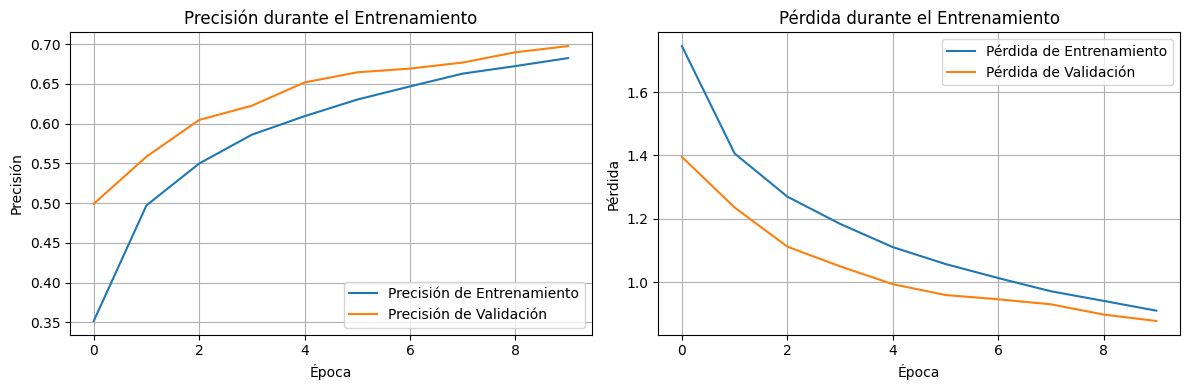

In [65]:
# Visualizar el historial de entrenamiento
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el Entrenamiento')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 3.3 Prediction - Función de Predicción

A continuación se muestra una visualización de varias imágenes del conjunto de prueba con sus predicciones correspondientes.


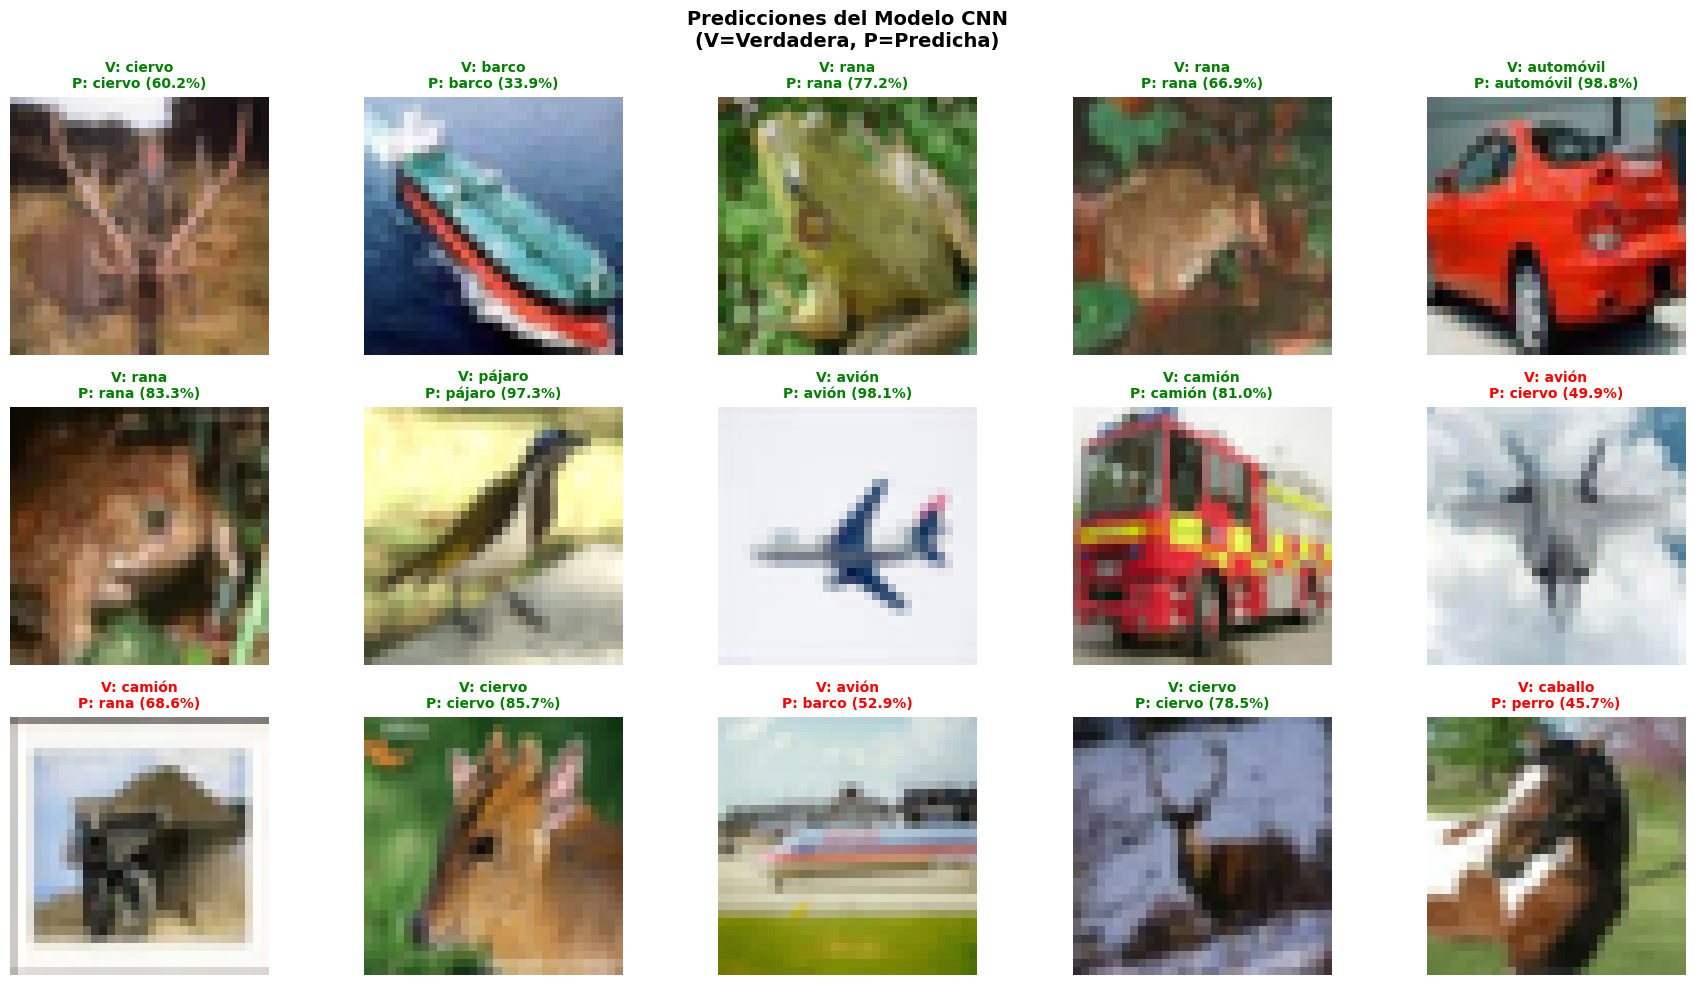

In [79]:
# Visualizar predicciones de varias imágenes del conjunto de prueba
num_images = 15  # Número de imágenes a visualizar

# Asegurar que labels sea un array 1D
if len(test_labels.shape) > 1:
    test_labels_flat = test_labels.flatten()
else:
    test_labels_flat = test_labels

# Seleccionar imágenes aleatorias
indices = np.random.choice(len(test_images), num_images, replace=False)

# Realizar predicciones
predictions = model.predict(test_images[indices], verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# Convertir logits a probabilidades
probabilities = tf.nn.softmax(predictions).numpy()
confidence_scores = np.max(probabilities, axis=1)

# Visualizar
plt.figure(figsize=(18, 10))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i + 1)
    plt.imshow(test_images[idx])
    
    true_label = test_labels_flat[idx]
    pred_label = predicted_classes[i]
    confidence = confidence_scores[i]
    
    # Color del título: verde si es correcto, rojo si es incorrecto
    color = 'green' if true_label == pred_label else 'red'
    
    plt.title(f"V: {class_names[true_label]}\n"
              f"P: {class_names[pred_label]} ({confidence*100:.1f}%)",
              color=color, fontsize=10, fontweight='bold')
    plt.axis('off')

plt.suptitle('Predicciones del Modelo CNN\n(V=Verdadera, P=Predicha)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


---

# 4. Model Evaluation - Evaluación del Modelo

Para evaluar el rendimiento de la Red Neuronal Convolucional, utilizaremos las siguientes métricas:

## 4.1 Accuracy (Precisión)

La precisión (accuracy) es la proporción de predicciones correctas sobre el total de predicciones. Es una métrica intuitiva que indica qué tan bien clasifica el modelo en general.

**Fórmula**:
$$Accuracy = \frac{\text{Número de predicciones correctas}}{\text{Total de predicciones}} = \frac{TP + TN}{TP + TN + FP + FN}$$

Donde:
- TP (True Positives): Predicciones correctas positivas
- TN (True Negatives): Predicciones correctas negativas
- FP (False Positives): Predicciones incorrectas positivas
- FN (False Negatives): Predicciones incorrectas negativas


In [70]:
# 4.1 Evaluar el modelo con Accuracy
print("\n" + "="*50)
print("EVALUACIÓN DEL MODELO - ACCURACY")
print("="*50)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print(f"\nResultados de la Evaluación:")
print(f"  - Pérdida (Loss): {test_loss:.4f}")
print(f"  - Precisión (Accuracy): {test_accuracy:.4f}")
print(f"  - Precisión (Accuracy): {test_accuracy*100:.2f}%")

# También evaluar en el conjunto de entrenamiento para comparar
train_loss, train_accuracy = model.evaluate(train_images, train_labels, verbose=0)

print(f"\nComparación:")
print(f"  - Precisión en Entrenamiento: {train_accuracy*100:.2f}%")
print(f"  - Precisión en Prueba: {test_accuracy*100:.2f}%")
print(f"  - Diferencia: {(train_accuracy - test_accuracy)*100:.2f}%")

if train_accuracy - test_accuracy > 0.1:
    print("\nADVERTENCIA: El modelo puede estar sobreajustado (overfitting)")
    print("   (Gran diferencia entre precision de entrenamiento y prueba)")
else:
    print("\nEl modelo parece generalizar bien")



EVALUACIÓN DEL MODELO - ACCURACY
313/313 - 1s - 4ms/step - accuracy: 0.6975 - loss: 0.8780

Resultados de la Evaluación:
  - Pérdida (Loss): 0.8780
  - Precisión (Accuracy): 0.6975
  - Precisión (Accuracy): 69.75%

Comparación:
  - Precisión en Entrenamiento: 73.88%
  - Precisión en Prueba: 69.75%
  - Diferencia: 4.13%

El modelo parece generalizar bien


## 4.2 Confusion Matrix (Matriz de Confusión)

La matriz de confusión es una tabla que muestra el desempeño del modelo de clasificación. Cada fila representa las instancias de una clase verdadera, mientras que cada columna representa las instancias de una clase predicha. Esto permite identificar:

- Qué clases se confunden entre sí
- Dónde el modelo comete más errores
- La distribución de errores por clase

**Interpretación**:
- La diagonal principal contiene los verdaderos positivos (predicciones correctas)
- Los valores fuera de la diagonal representan errores de clasificación
- Valores altos fuera de la diagonal indican confusión entre clases


In [71]:
# 4.2 Generar predicciones para toda la matriz de confusión
print("\n" + "="*50)
print("GENERANDO PREDICCIONES PARA MATRIZ DE CONFUSIÓN")
print("="*50)

# Obtener todas las predicciones del conjunto de prueba
predictions = model.predict(test_images, verbose=1)

# Convertir logits a clases predichas
predicted_labels = np.argmax(predictions, axis=1)

# Asegurar que las etiquetas verdaderas estén en formato 1D
true_labels = test_labels.flatten()

print(f"\nForma de las predicciones: {predictions.shape}")
print(f"Forma de las etiquetas predichas: {predicted_labels.shape}")
print(f"Forma de las etiquetas verdaderas: {true_labels.shape}")



GENERANDO PREDICCIONES PARA MATRIZ DE CONFUSIÓN
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Forma de las predicciones: (10000, 10)
Forma de las etiquetas predichas: (10000,)
Forma de las etiquetas verdaderas: (10000,)


In [72]:
# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN")
print("="*50)
print("\nLa matriz de confusión muestra:")
print("  - Filas: Etiquetas verdaderas")
print("  - Columnas: Etiquetas predichas")
print("  - Diagonal: Predicciones correctas")
print("  - Fuera de diagonal: Errores de clasificación")

# Mostrar matriz numérica
print("\nMatriz de Confusión (valores numéricos):")
print("\n" + " " * 5, end="")
for i, name in enumerate(class_names):
    print(f"{name[:4]:>6}", end="")
print()
for i, row in enumerate(cm):
    print(f"{class_names[i][:4]:>5}", end=" ")
    for val in row:
        print(f"{val:6d}", end="")
    print()



MATRIZ DE CONFUSIÓN

La matriz de confusión muestra:
  - Filas: Etiquetas verdaderas
  - Columnas: Etiquetas predichas
  - Diagonal: Predicciones correctas
  - Fuera de diagonal: Errores de clasificación

Matriz de Confusión (valores numéricos):

       avió  auto  pája  gato  cier  perr  rana  caba  barc  cami
 avió    688    23    75    31    19     5    13    16   104    26
 auto     21   831     8    17     5     3    21     4    37    53
 pája     57     3   516    84   136    85    85    21     7     6
 gato     10     7    60   565    71   147    90    27    11    12
 cier     18     2    49    72   679    19    67    80    12     2
 perr      6     2    41   246    52   568    30    48     5     2
 rana      6     5    32    77    35     9   826     5     2     3
 caba     11     3    25    53    70    75    11   747     0     5
 barc     64    27    15    33     9     4     6     6   822    14
 cami     30   110     8    25     8     6    23    14    43   733


<Figure size 1200x1000 with 0 Axes>

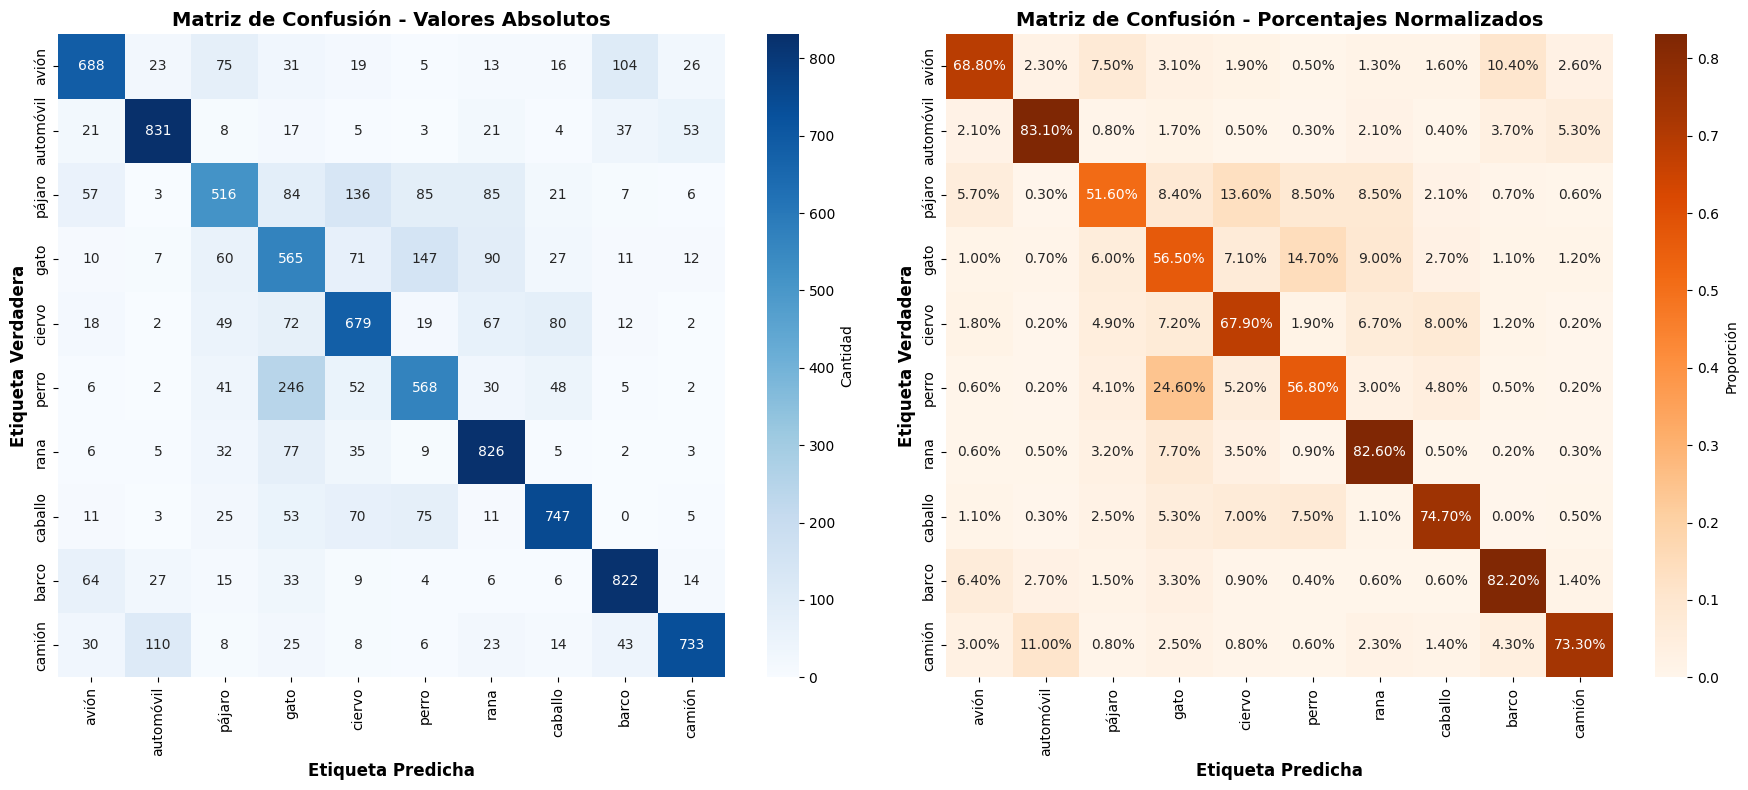

In [73]:
# Visualizar la matriz de confusión con heatmap
plt.figure(figsize=(12, 10))

# Crear heatmap normalizado (porcentajes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Crear subplots para ambas visualizaciones
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Matriz de confusión con valores absolutos
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[0], cbar_kws={'label': 'Cantidad'})
axes[0].set_xlabel('Etiqueta Predicha', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Etiqueta Verdadera', fontsize=12, fontweight='bold')
axes[0].set_title('Matriz de Confusión - Valores Absolutos', fontsize=14, fontweight='bold')

# Matriz de confusión normalizada (porcentajes)
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Oranges',
            xticklabels=class_names, yticklabels=class_names,
            ax=axes[1], cbar_kws={'label': 'Proporción'})
axes[1].set_xlabel('Etiqueta Predicha', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Etiqueta Verdadera', fontsize=12, fontweight='bold')
axes[1].set_title('Matriz de Confusión - Porcentajes Normalizados', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [74]:
# Análisis detallado de la matriz de confusión
print("\n" + "="*50)
print("ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN")
print("="*50)

# Calcular métricas por clase
for i, class_name in enumerate(class_names):
    tp = cm[i, i]  # Verdaderos positivos
    fn = cm[i, :].sum() - tp  # Falsos negativos (fila i menos diagonal)
    fp = cm[:, i].sum() - tp  # Falsos positivos (columna i menos diagonal)
    tn = cm.sum() - (tp + fn + fp)  # Verdaderos negativos
    
    # Calcular métricas
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy_class = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    print(f"\n{class_name.upper()}:")
    print(f"  - Verdaderos Positivos: {tp}")
    print(f"  - Falsos Negativos: {fn}")
    print(f"  - Falsos Positivos: {fp}")
    print(f"  - Precisión (Precision): {precision:.4f} ({precision*100:.2f}%)")
    print(f"  - Sensibilidad (Recall): {recall:.4f} ({recall*100:.2f}%)")
    print(f"  - F1-Score: {f1_score:.4f}")
    print(f"  - Accuracy por clase: {accuracy_class:.4f} ({accuracy_class*100:.2f}%)")

# Identificar las clases más confundidas
print("\n" + "="*50)
print("CLASES MÁS CONFUNDIDAS")
print("="*50)

# Encontrar los errores más comunes (fuera de la diagonal)
errors = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm[i, j] > 0:
            errors.append((cm[i, j], class_names[i], class_names[j]))

# Ordenar por cantidad de errores
errors.sort(reverse=True)

print("\nLos 10 errores más comunes:")
for idx, (count, true_class, pred_class) in enumerate(errors[:10], 1):
    print(f"  {idx}. {true_class:12s} clasificado como {pred_class:12s}: {count} veces")



ANÁLISIS DETALLADO DE LA MATRIZ DE CONFUSIÓN

AVIÓN:
  - Verdaderos Positivos: 688
  - Falsos Negativos: 312
  - Falsos Positivos: 223
  - Precisión (Precision): 0.7552 (75.52%)
  - Sensibilidad (Recall): 0.6880 (68.80%)
  - F1-Score: 0.7200
  - Accuracy por clase: 0.6880 (68.80%)

AUTOMÓVIL:
  - Verdaderos Positivos: 831
  - Falsos Negativos: 169
  - Falsos Positivos: 182
  - Precisión (Precision): 0.8203 (82.03%)
  - Sensibilidad (Recall): 0.8310 (83.10%)
  - F1-Score: 0.8256
  - Accuracy por clase: 0.8310 (83.10%)

PÁJARO:
  - Verdaderos Positivos: 516
  - Falsos Negativos: 484
  - Falsos Positivos: 313
  - Precisión (Precision): 0.6224 (62.24%)
  - Sensibilidad (Recall): 0.5160 (51.60%)
  - F1-Score: 0.5642
  - Accuracy por clase: 0.5160 (51.60%)

GATO:
  - Verdaderos Positivos: 565
  - Falsos Negativos: 435
  - Falsos Positivos: 638
  - Precisión (Precision): 0.4697 (46.97%)
  - Sensibilidad (Recall): 0.5650 (56.50%)
  - F1-Score: 0.5129
  - Accuracy por clase: 0.5650 (56.50%)

C

In [75]:
# Reporte de clasificación completo usando sklearn
print("\n" + "="*50)
print("REPORTE DE CLASIFICACIÓN COMPLETO")
print("="*50)

report = classification_report(true_labels, predicted_labels, 
                              target_names=class_names,
                              digits=4)
print("\n", report)

# Resumen de métricas globales
from sklearn.metrics import precision_score, recall_score, f1_score

precision_macro = precision_score(true_labels, predicted_labels, average='macro')
recall_macro = recall_score(true_labels, predicted_labels, average='macro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')

print("\n" + "="*50)
print("MÉTRICAS GLOBALES (Promedio Macro)")
print("="*50)
print(f"Precisión (Precision): {precision_macro:.4f} ({precision_macro*100:.2f}%)")
print(f"Sensibilidad (Recall): {recall_macro:.4f} ({recall_macro*100:.2f}%)")
print(f"F1-Score: {f1_macro:.4f}")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")



REPORTE DE CLASIFICACIÓN COMPLETO

               precision    recall  f1-score   support

       avión     0.7552    0.6880    0.7200      1000
   automóvil     0.8203    0.8310    0.8256      1000
      pájaro     0.6224    0.5160    0.5642      1000
        gato     0.4697    0.5650    0.5129      1000
      ciervo     0.6264    0.6790    0.6516      1000
       perro     0.6167    0.5680    0.5914      1000
        rana     0.7048    0.8260    0.7606      1000
     caballo     0.7717    0.7470    0.7591      1000
       barco     0.7881    0.8220    0.8047      1000
      camión     0.8563    0.7330    0.7899      1000

    accuracy                         0.6975     10000
   macro avg     0.7032    0.6975    0.6980     10000
weighted avg     0.7032    0.6975    0.6980     10000


MÉTRICAS GLOBALES (Promedio Macro)
Precisión (Precision): 0.7032 (70.32%)
Sensibilidad (Recall): 0.6975 (69.75%)
F1-Score: 0.6980
Accuracy: 0.6975 (69.75%)



EJEMPLOS DE ERRORES DE CLASIFICACIÓN

Total de errores: 3025 de 10000 (30.25%)


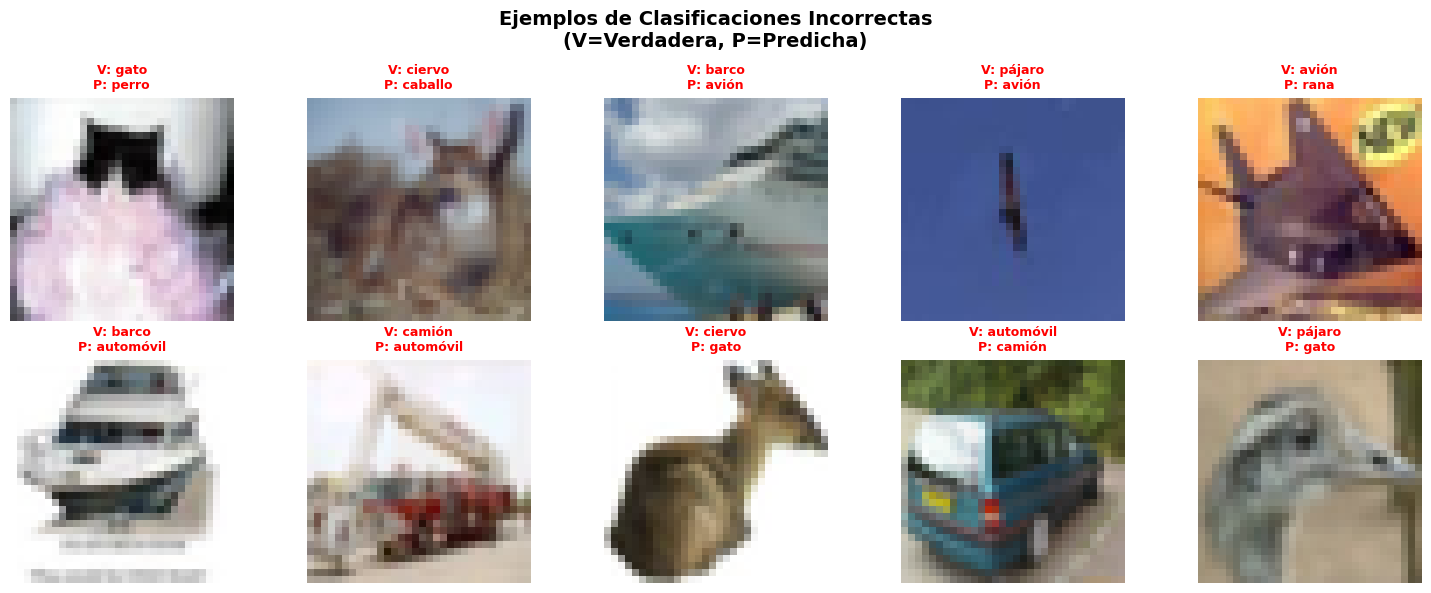

In [76]:
# Visualizar algunos ejemplos de errores de clasificación
print("\n" + "="*50)
print("EJEMPLOS DE ERRORES DE CLASIFICACIÓN")
print("="*50)

# Encontrar índices donde la predicción es incorrecta
incorrect_indices = np.where(true_labels != predicted_labels)[0]

print(f"\nTotal de errores: {len(incorrect_indices)} de {len(test_images)} ({len(incorrect_indices)/len(test_images)*100:.2f}%)")

# Visualizar algunos errores
num_errors_to_show = min(10, len(incorrect_indices))
error_indices = np.random.choice(incorrect_indices, num_errors_to_show, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(error_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[idx])
    
    true_class = class_names[true_labels[idx]]
    pred_class = class_names[predicted_labels[idx]]
    
    plt.title(f"V: {true_class}\nP: {pred_class}", 
              color='red', fontsize=9, fontweight='bold')
    plt.axis('off')

plt.suptitle('Ejemplos de Clasificaciones Incorrectas\n(V=Verdadera, P=Predicha)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
